# Simulations & Experiments for IXO's Pilot Project with Chimple Learning 

[Chimple Learning](http://www.chimple.org/) is a non-profit educational organization dedicated to improving children's learning experience fun yet effective through gamification. The [IXO Foundation](https://ixo.world/) has partnered with Chimple to fund educational projects using the [alpha-bond](https://www.alphabond.org/) mechanism. 

We have modified the generic alpha-bond mechanism to include a **Continuous Funding** capability and a **Secondary Market** for selling supply tokens. 


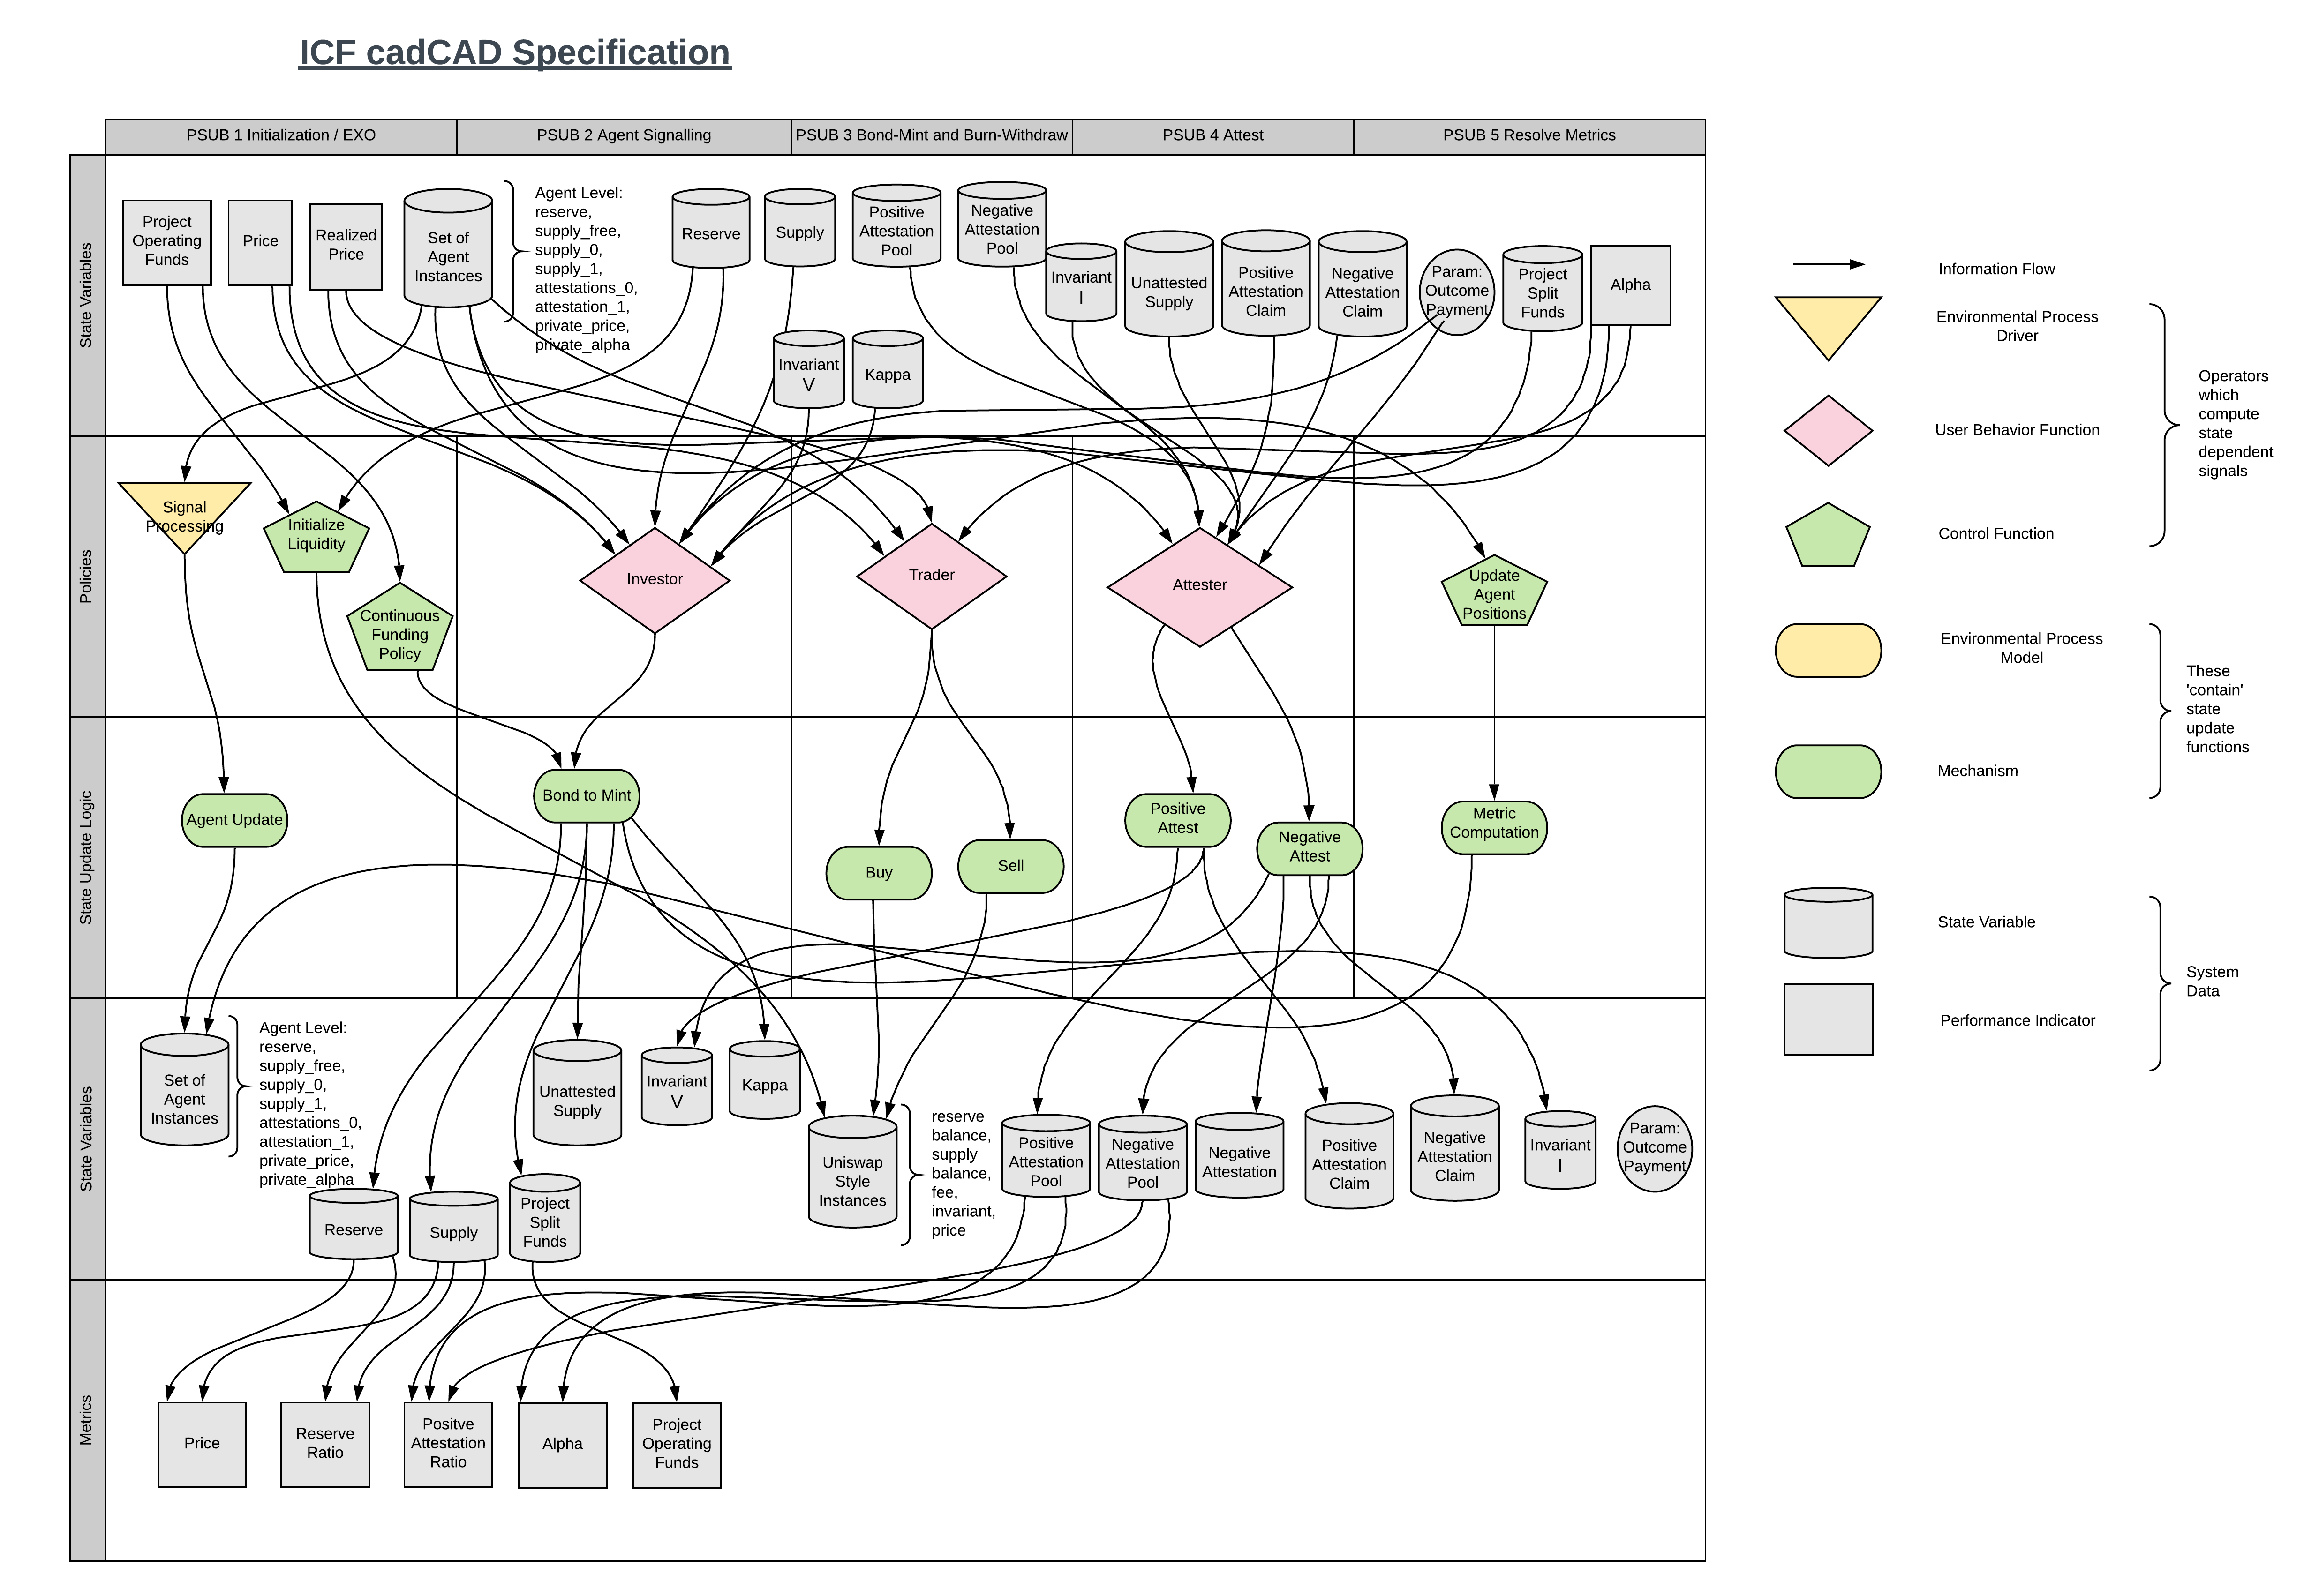

In [1]:
# For displaying image files
from IPython.display import Image
Image("images/Phase_3_continuous.png")

## Setup

- Continuous funding is enabled, meaning that the project will get continually funded throughout the execution phase. <br/>
- Burn on the primary bonding curve is disabled. Agents can only bond and cannot burn on the bonding curve. However, they can sell their supply tokens in a secondary market. <br/>
- Theta is set to 0.9, such that 90% of initial funds raised are allocated to project operating funds. 10% of the initial funds go towards the bonding curve reserve. <br/>

Update [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

- ENABLE_CONTINUOUS = [True] <br/>
- ENABLE_BURN = [False] <br/>
- THETA = [0.9] 

Alpha belief and Price belief is set to be linearly increasing. <br/>
Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1]


Burning tokens on the bonding curve is not allowed. Participants in the bonding curve will only be able to bond to acquire supply tokens. They will not be able to burn or sell their supply tokens on the primary market, i.e the bonding curve. They can, however, sell their supply tokens on a **secondary market**. <br/>

- Initial capital raised through a Community Mutual Savings mechanism = $66,000

- A hatch installment will be made by a Impact Investor, amounting to = $30,000 <br/>

- This amount will be locked up in the Attest Negative token pool, as $S_0$ tokens. <br/>

- The Impact Investor disburses monthly payments in the 12 months, amount to = $3000 per month


**This makes the total initial investment = $66,000.** <br/>

**The total outcome payment is a 10% premium over the initial investment = $72,000**

NOTE: To run and save data in the test battery, you will need to install *pickle*. <br>
Run command *pip install pickle-mixin*


## Experiment 1: Agent Payouts
#### Empirically demonstrate that agents' payouts while participating in both bonding curve *and* prediction market is greater, on an average, than their payouts while participating in a pure bonding curve.

### Hypothesis 
Agents are able to avail themselves to a significantly larger earning potential by participating in the prediction market (attestation) mechanism. 

### Experiment setup
We test two cases - 
- Test Case A: Where agents are able to participate in only a pure bonding curve
- Test Case B: Where agents are able to participate in both the bonding curve as well as the prediction market. 

This is a controlled experiment where all factors and parameters are maintained to be the same across both test cases, except for the agents' ability to participate in the prediction market.


### Test Case A: Agents can only participate in a pure bonding curve

We disable agents from being able to anticipate in the attestation mechanism by modifying the conditions to unacheivable and domain-exceeding amounts: 

Update line 132 and 163 in [choose_action.py](src/sim/model/parts/choose_action.py) to reflect the equations below:

```
if alpha > private_alpha+1 and s_free > 0: <br>
       attest_negative
        
elif alpha+1 < private_alpha and s_free > 0: <br>
       attest_positive
       
```



- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1]


#### Result

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *


import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.98s


In [3]:
experiments = run.run()
plot_title = 'Test Case A: Agents can only participate in a pure bonding curve'

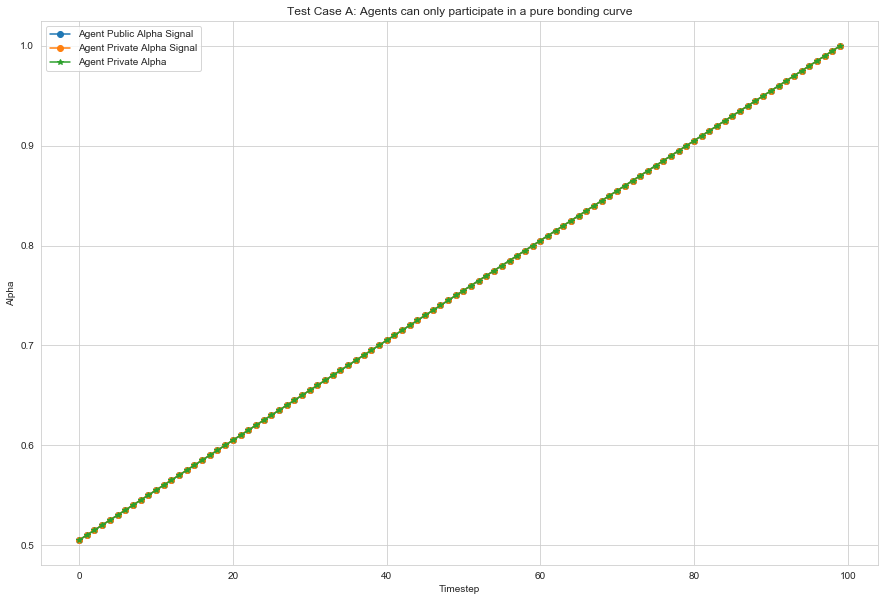

([0.505,
  0.51,
  0.515,
  0.52,
  0.525,
  0.53,
  0.535,
  0.54,
  0.545,
  0.55,
  0.555,
  0.56,
  0.565,
  0.5700000000000001,
  0.575,
  0.58,
  0.585,
  0.59,
  0.595,
  0.6,
  0.605,
  0.61,
  0.615,
  0.62,
  0.625,
  0.63,
  0.635,
  0.64,
  0.645,
  0.65,
  0.655,
  0.66,
  0.665,
  0.67,
  0.675,
  0.6799999999999999,
  0.685,
  0.69,
  0.6950000000000001,
  0.7,
  0.7050000000000001,
  0.71,
  0.715,
  0.72,
  0.725,
  0.73,
  0.735,
  0.74,
  0.745,
  0.75,
  0.755,
  0.76,
  0.765,
  0.77,
  0.775,
  0.78,
  0.785,
  0.79,
  0.7949999999999999,
  0.8,
  0.8049999999999999,
  0.81,
  0.815,
  0.8200000000000001,
  0.825,
  0.8300000000000001,
  0.835,
  0.8400000000000001,
  0.845,
  0.8500000000000001,
  0.855,
  0.86,
  0.865,
  0.87,
  0.875,
  0.88,
  0.885,
  0.89,
  0.895,
  0.9,
  0.905,
  0.91,
  0.915,
  0.9199999999999999,
  0.925,
  0.9299999999999999,
  0.935,
  0.94,
  0.9450000000000001,
  0.95,
  0.9550000000000001,
  0.96,
  0.9650000000000001,
  0.97,
  

In [4]:
alpha_plot(experiments,plot_title)

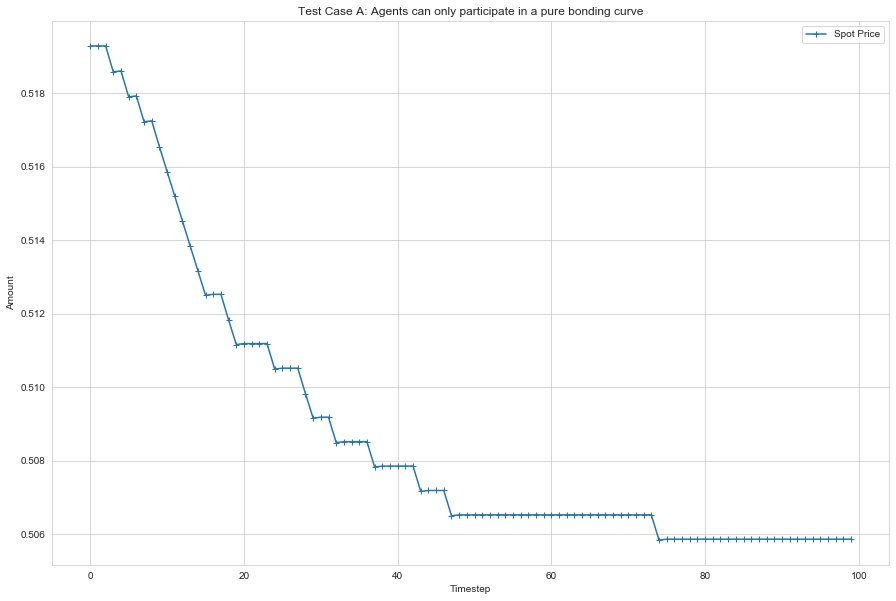

6      0.519293
12     0.519293
18     0.519293
24     0.518586
30     0.518612
         ...   
576    0.505863
582    0.505863
588    0.505863
594    0.505863
600    0.505863
Name: spot_price, Length: 100, dtype: float64

In [5]:
price(experiments,plot_title)

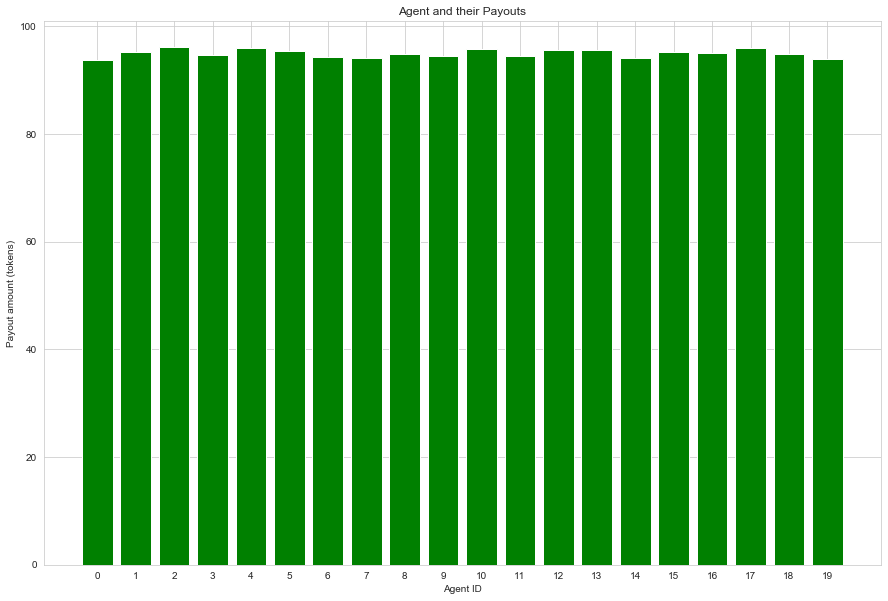

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 array([93.80263395, 95.16993896, 96.16705073, 94.67243665, 96.04130258,
        95.41474361, 94.30082319, 94.04905659, 94.92090157, 94.42455003,
        95.79024467, 94.54842112, 95.66493461, 95.54458057, 94.17248356,
        95.28987127, 95.04055345, 95.91570061, 94.79659676, 93.92577343]))

In [6]:
agent_payout(experiments)

### Test Case B: Agents can participate in a bonding curve *and* prediction market

Agents are allowed to participate in the attestation mechanism by under the following conditions:

Update line 132 and 163 in [choose_action.py](src/sim/model/parts/choose_action.py) to reflect the equations below:

```
if alpha > private_alpha and s_free > 0: <br>
       attest_negative
        
elif alpha < private_alpha and s_free > 0: <br>
       attest_positive
       
```

- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing

Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1]

#### Result

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run
from src.sim.model.parts.utils import *


import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.76s


In [2]:
experiments = run.run()
plot_title = 'Test Case B: Agents can participate in a bonding curve and prediction market'

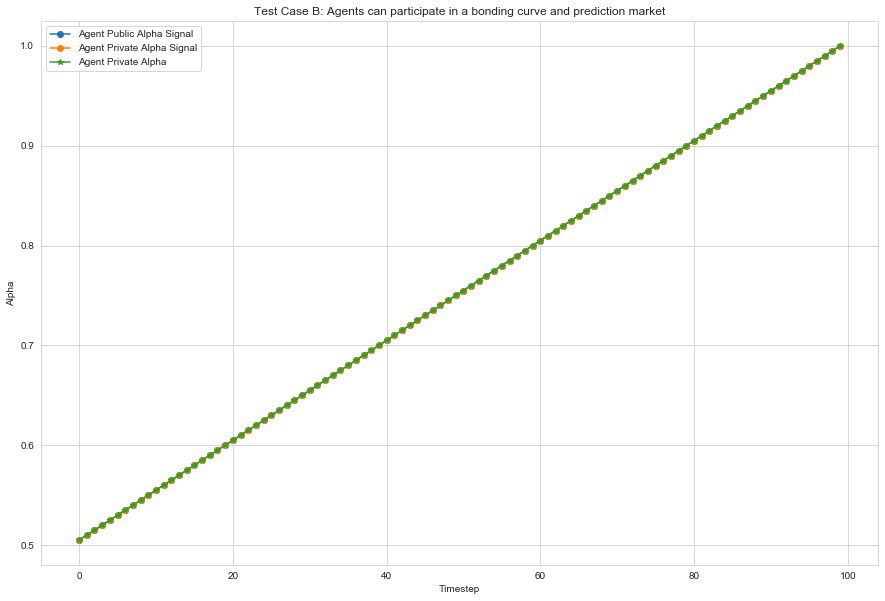

([0.505,
  0.51,
  0.515,
  0.52,
  0.525,
  0.53,
  0.535,
  0.54,
  0.545,
  0.55,
  0.555,
  0.56,
  0.565,
  0.5700000000000001,
  0.575,
  0.58,
  0.585,
  0.59,
  0.595,
  0.6,
  0.605,
  0.61,
  0.615,
  0.62,
  0.625,
  0.63,
  0.635,
  0.64,
  0.645,
  0.65,
  0.655,
  0.66,
  0.665,
  0.67,
  0.675,
  0.6799999999999999,
  0.685,
  0.69,
  0.6950000000000001,
  0.7,
  0.7050000000000001,
  0.71,
  0.715,
  0.72,
  0.725,
  0.73,
  0.735,
  0.74,
  0.745,
  0.75,
  0.755,
  0.76,
  0.765,
  0.77,
  0.775,
  0.78,
  0.785,
  0.79,
  0.7949999999999999,
  0.8,
  0.8049999999999999,
  0.81,
  0.815,
  0.8200000000000001,
  0.825,
  0.8300000000000001,
  0.835,
  0.8400000000000001,
  0.845,
  0.8500000000000001,
  0.855,
  0.86,
  0.865,
  0.87,
  0.875,
  0.88,
  0.885,
  0.89,
  0.895,
  0.9,
  0.905,
  0.91,
  0.915,
  0.9199999999999999,
  0.925,
  0.9299999999999999,
  0.935,
  0.94,
  0.9450000000000001,
  0.95,
  0.9550000000000001,
  0.96,
  0.9650000000000001,
  0.97,
  

In [4]:
alpha_plot(experiments,plot_title)

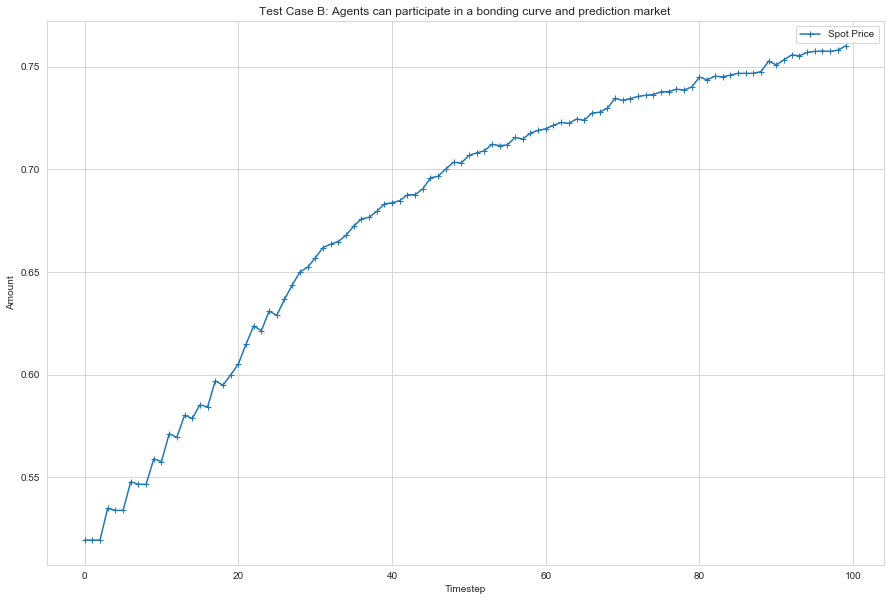

6      0.519293
12     0.519293
18     0.519293
24     0.534800
30     0.533772
         ...   
576    0.757514
582    0.757732
588    0.757533
594    0.758117
600    0.760202
Name: spot_price, Length: 100, dtype: float64

In [3]:
price(experiments,plot_title)

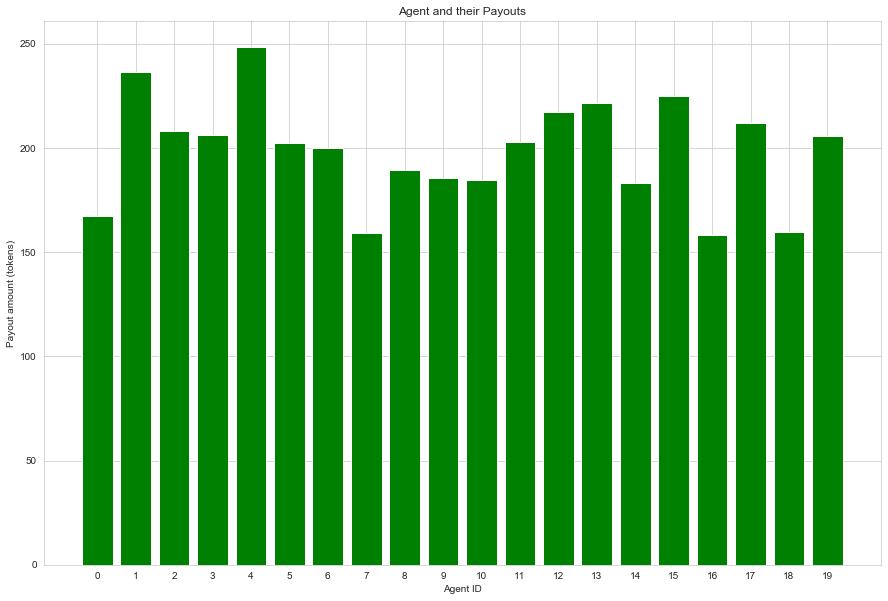

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 array([167.35669704, 236.69445232, 208.33212388, 206.13793579,
        248.43243629, 202.4487015 , 199.92394533, 159.43402486,
        189.52226861, 185.7730138 , 184.63397059, 202.92599162,
        217.46228531, 221.70632881, 182.99862412, 225.00001885,
        158.0689808 , 211.76879758, 159.58480313, 205.56131232]))

In [5]:
agent_payout(experiments)

### Experiment 1: Inference

Agents earn a significantly larger payout when being able to participate in both the bonding curve as well as the prediction market mechanism. The greater variation in agents' payouts in Test Case B suggests that the earning potential each individual agent is magnified by the actions they take.

## Experiment 2: Test Battery for Continuous Funding and Secondary Market Mechanisms
#### Each binary combination of 3 factors - Continuous Funding, Burn on Primary Market, and Private Alpha - are examined.

### Experiment Setup

We run controlled experiments where Continuous Funding, Burn on Primary Market, and Private Alpha are controlled by being set to the following values:

- Continuous Funding can be enabled $1$ or disabled $0$
- Burn on Primary Market can be enabled $1$ or disabled $0$
- Private Alpha $\hat\alpha$ can take on the forms: steadily increasing $\uparrow$, or steadily decreasing $\downarrow$ 

Every combination of the signal forms is tested in the experiments; see table below.

- 1 indcates that a mechanism is enabled
- 0 indicates that a mechanism is disabled
- $\uparrow$ indicates a **controlled and increasing** signal
- $\downarrow$ indicates a **controlled and decreasing** signal

| | A | B | C | D | E | F | G | H |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Continuous Funding | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 
| Burn on Primary Market | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |  
| Private Alpha $\hat\alpha$ | $\downarrow$ | $\downarrow$ | $\downarrow$ | $\downarrow$ | $\uparrow$ | $\uparrow$ | $\uparrow$ | $\uparrow$ | 

This is a controlled experiment where all factors and parameters are maintained to be the same across both test cases, except for Continuous Funding, Burn on Primary Market, and Private Alpha.

### Test Case A: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha decreasing.

Update line 27 and 32 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:


ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [False] <br>


- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [-1]
- price_bias = [-1]

#### Result

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.75s


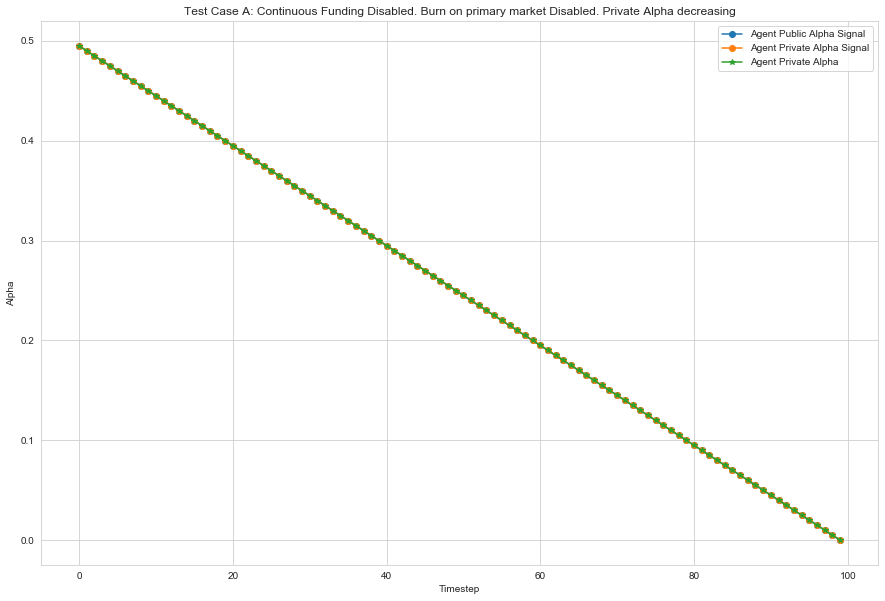

In [2]:
experiments = run.run()

plot_title = 'Test Case A: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha decreasing'

agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

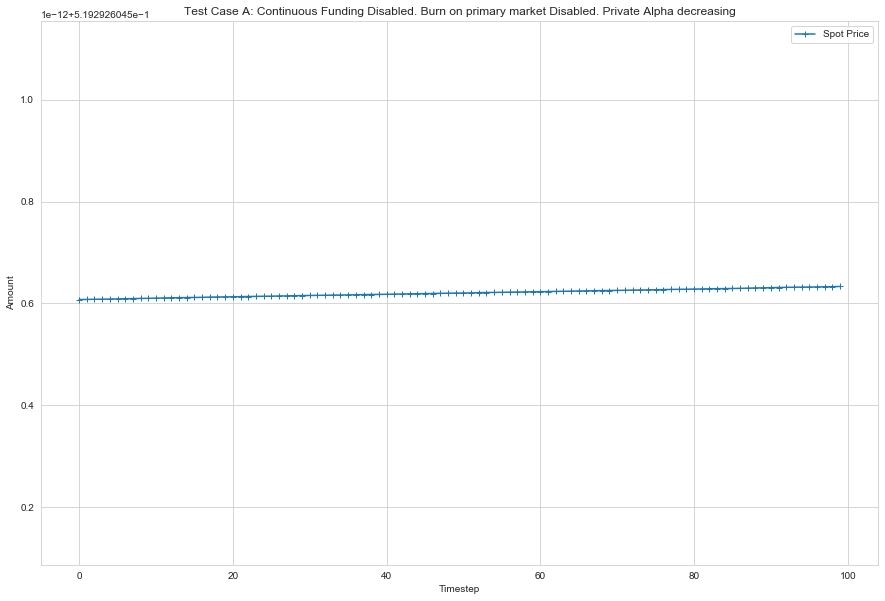

In [4]:
spot_price = price(experiments,plot_title)

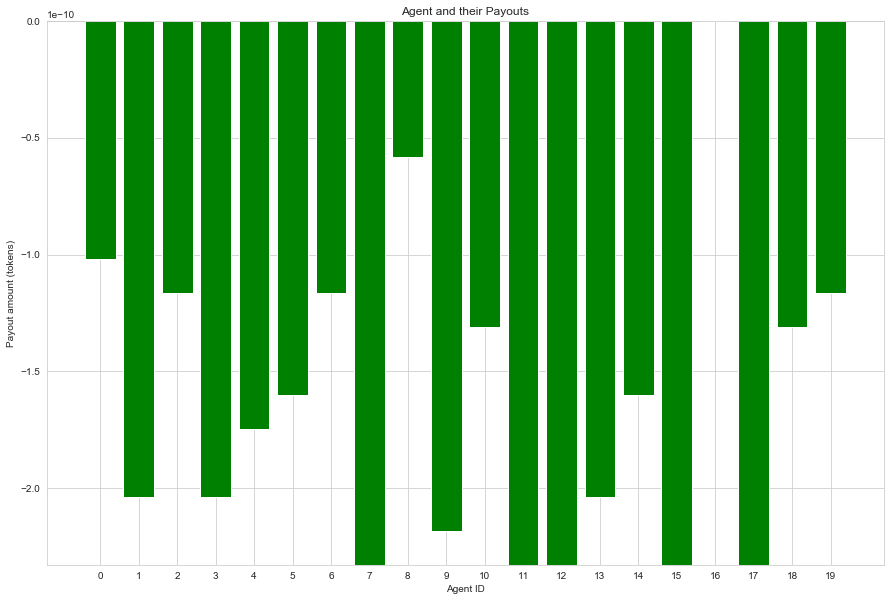

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:

## Save experiment data

import pickle

with open('chimple_data/Test_A/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_A/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_A/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_A/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_A/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case B: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha decreasing

Update line 27 and 32 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [False] <br>


- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [-1]
- price_bias = [-1] 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.83s


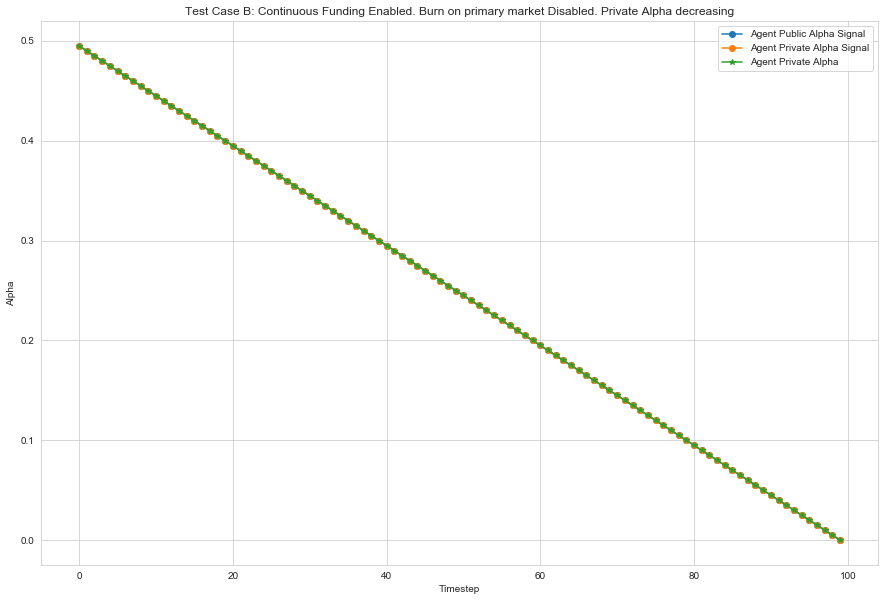

In [2]:
experiments = run.run()
plot_title = 'Test Case B: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha decreasing'

agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

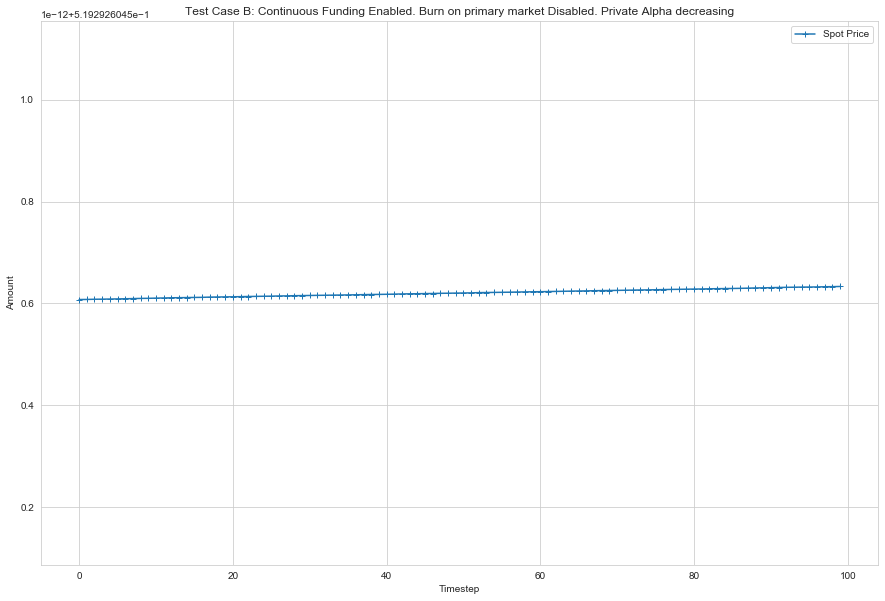

In [3]:
spot_price = price(experiments,plot_title)

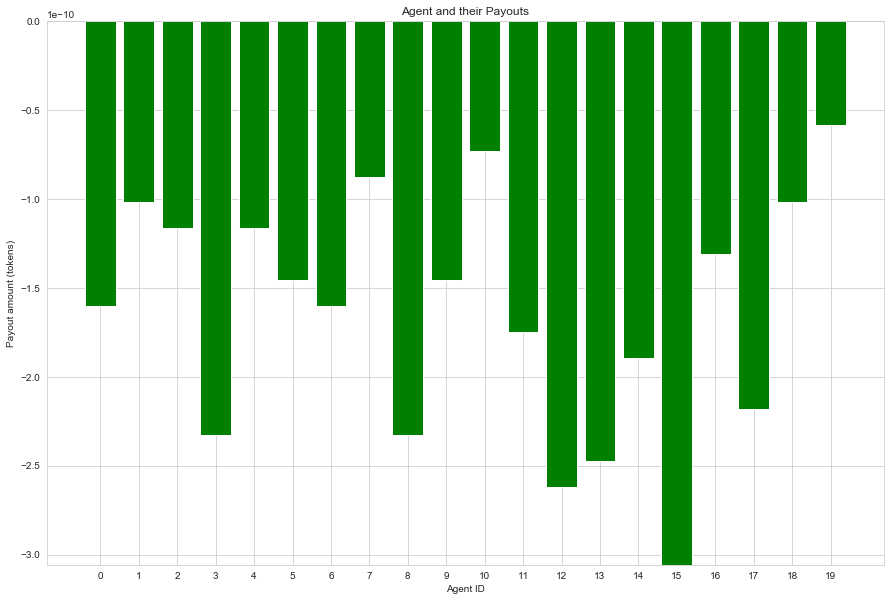

In [4]:
agent_id,payouts = agent_payout(experiments)

In [5]:
## Save experiment data

import pickle

with open('chimple_data/Test_B/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_B/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_B/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_B/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_B/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case C: Continuous Funding Disabled. Burn on primary marketEnabled. Private Alpha decreasing.

Update line 27 and 32 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:


ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [True] <br>

- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing

Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [-1]
- price_bias = [-1] 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.92s


In [2]:
experiments = run.run()
plot_title = 'Test Case C: Continuous Funding Disabled. Burn on primary marketEnabled. Private Alpha decreasing'

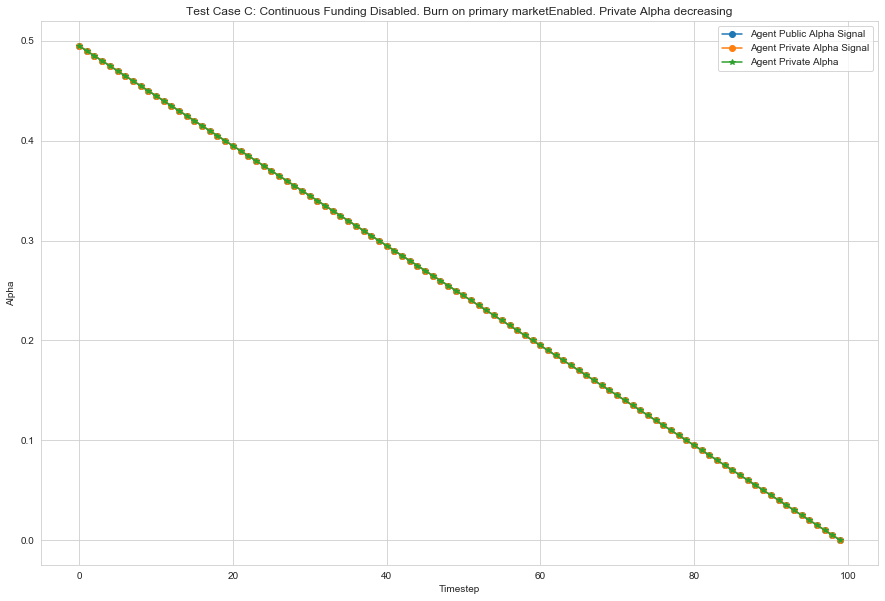

In [4]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

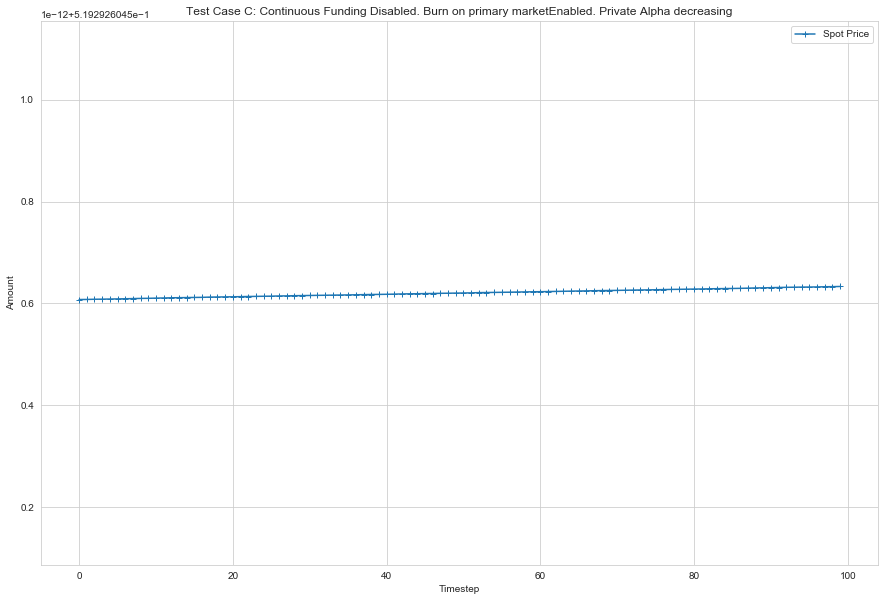

In [7]:
spot_price = price(experiments,plot_title)

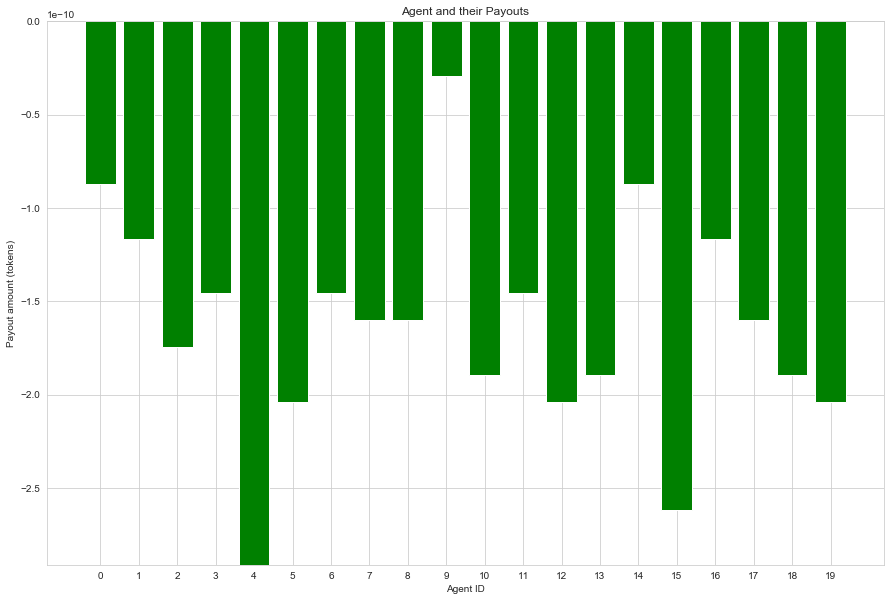

In [8]:
agent_id,payouts = agent_payout(experiments)

In [9]:

import pickle

with open('chimple_data/Test_C/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_C/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_C/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_C/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_C/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case D: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha decreasing.

Update line 27 and 28 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [True] <br>


- Number of agents = 20 
- Agents' private belief of alpha is linearly decreasing


Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [-1]
- price_bias = [-1] 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.74s


In [2]:
experiments = run.run()
plot_title = 'Test Case D: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha decreasing'

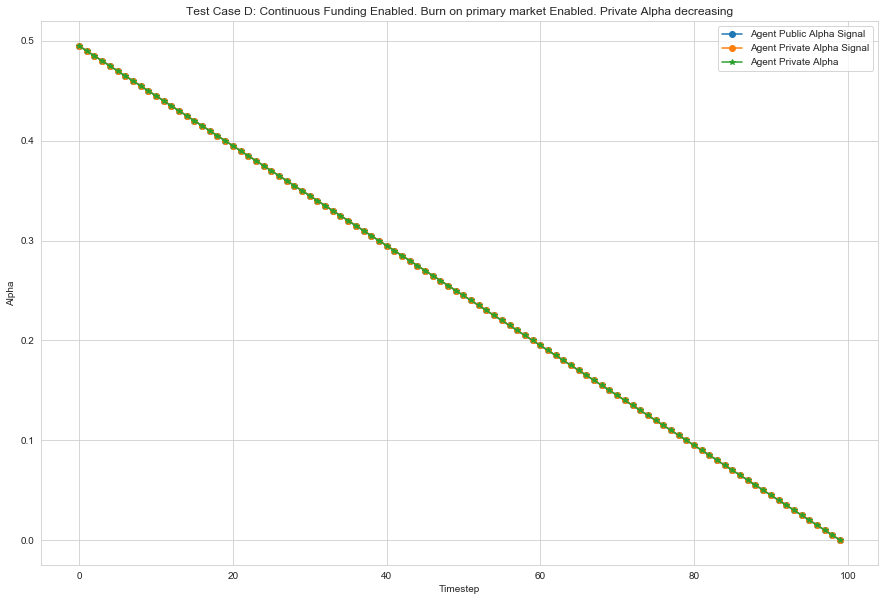

In [3]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

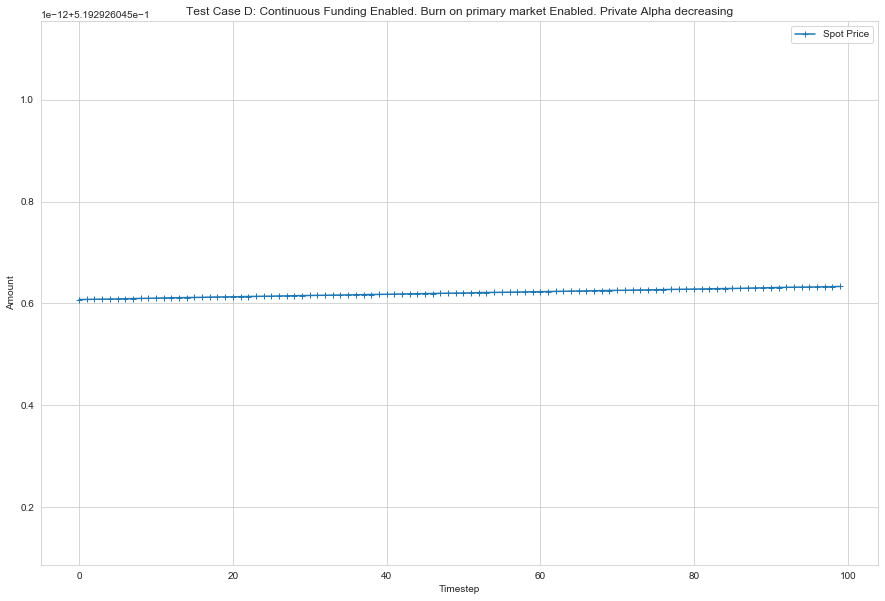

In [4]:
spot_price = price(experiments,plot_title)

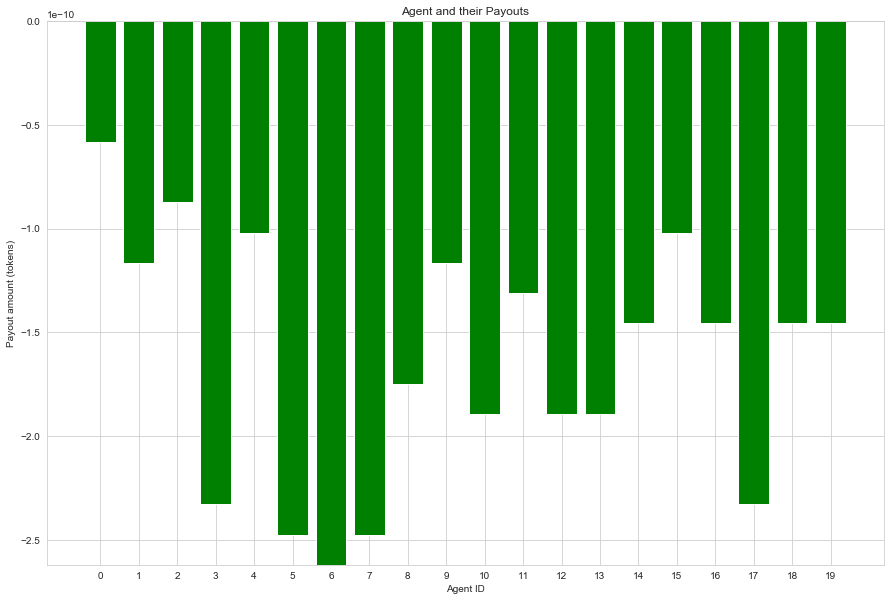

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:
import pickle

with open('chimple_data/Test_D/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_D/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_D/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_D/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_D/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case E: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha increasing.

Update line 27 and 28 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing


Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1] 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.74s


In [2]:
experiments = run.run()

plot_title = 'Test Case E: Continuous Funding Disabled. Burn on primary market Disabled. Private Alpha increasing'

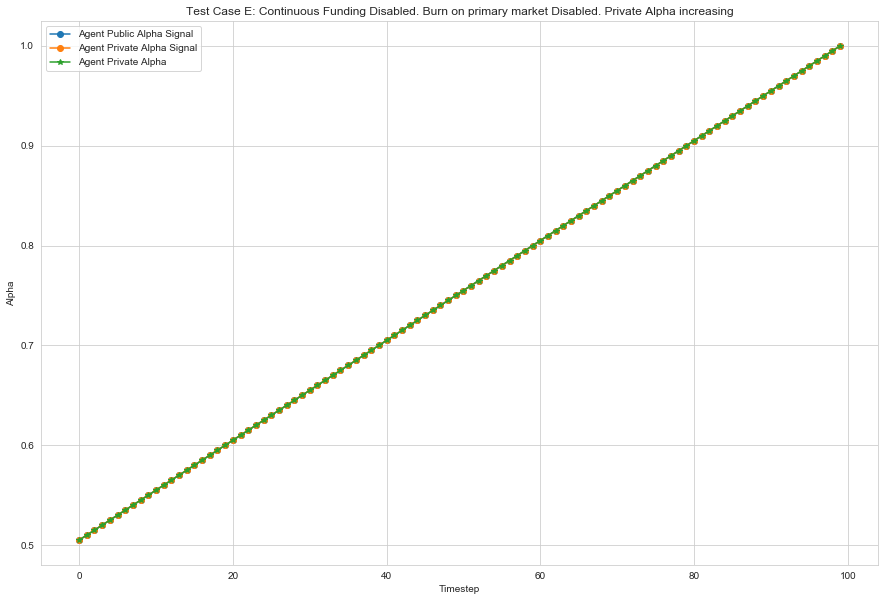

In [3]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

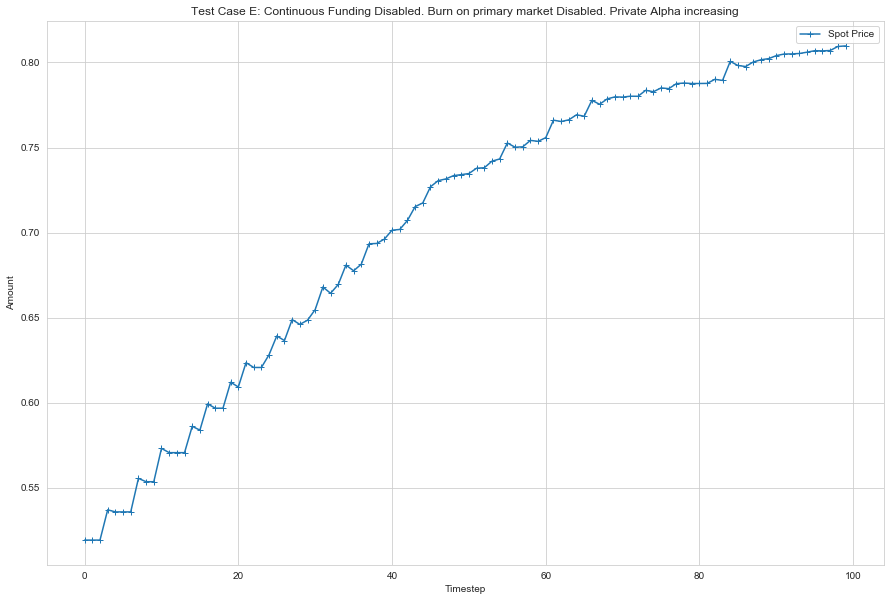

In [4]:
spot_price = price(experiments,plot_title)

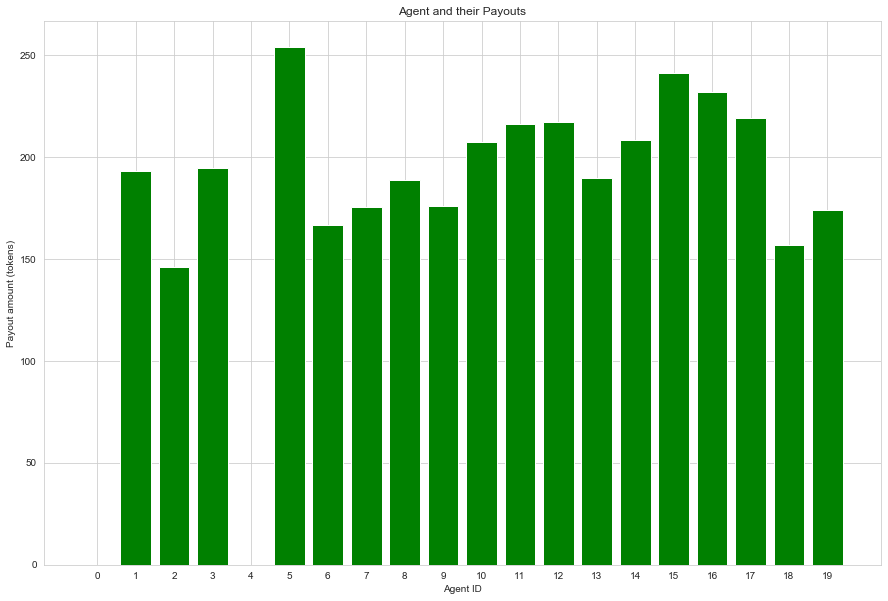

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:
import pickle

with open('chimple_data/Test_E/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_E/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_E/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_E/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_E/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case F: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha increasing.

Update line 27 and 28 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [False] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing


Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1] 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.83s


In [2]:
experiments = run.run()
plot_title = 'Test Case F: Continuous Funding Enabled. Burn on primary market Disabled. Private Alpha increasing'

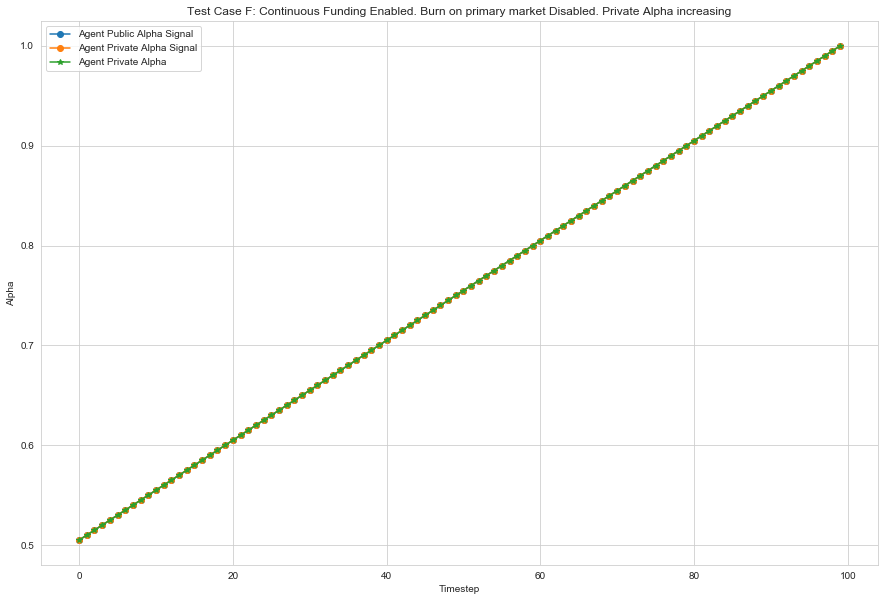

In [3]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

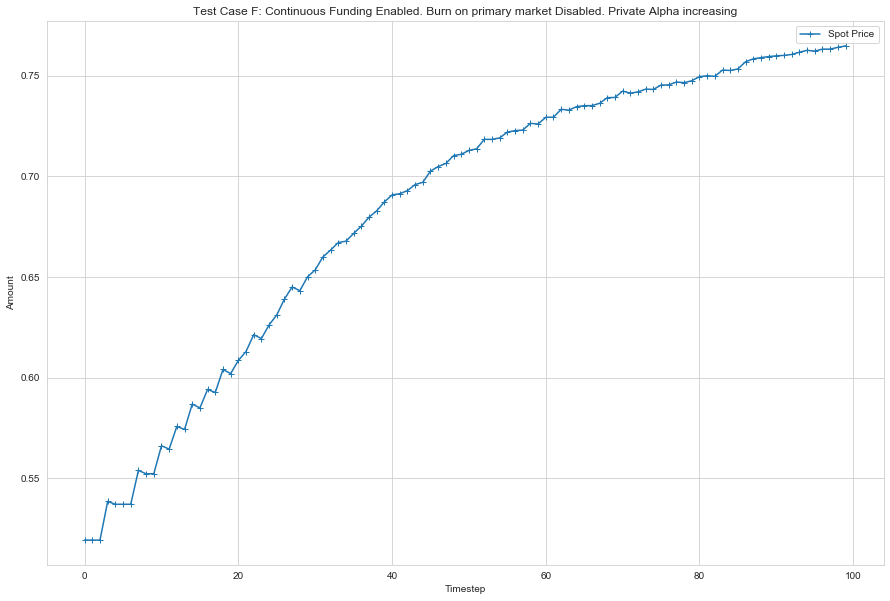

In [4]:
spot_price = price(experiments,plot_title)

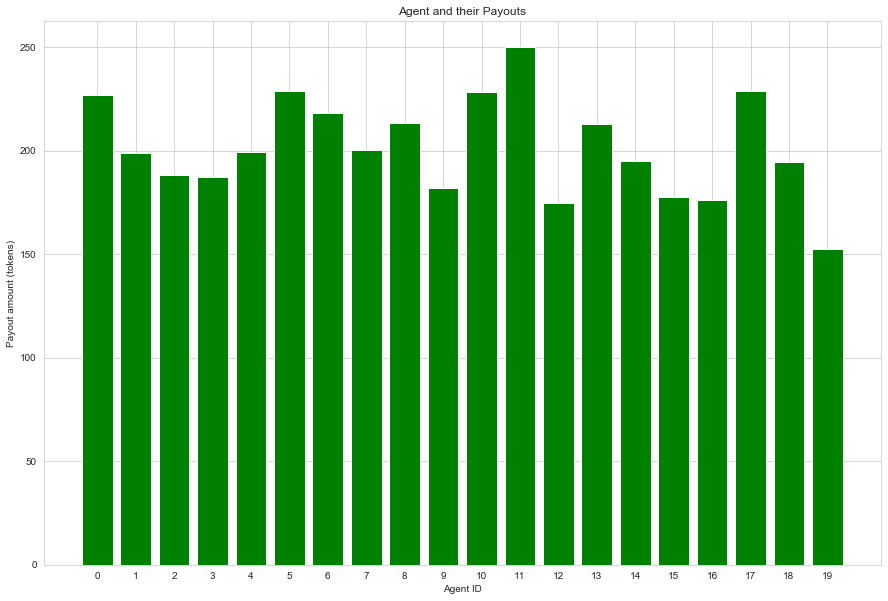

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:
import pickle

with open('chimple_data/Test_F/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_F/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_F/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_F/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_F/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case G: Continuous Funding Disabled. Burn on primary market Enabled. Private Alpha increasing.

Update line 27 and 28 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [False] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing


Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1] 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.82s


In [2]:
experiments = run.run()

plot_title = 'Test Case G: Continuous Funding Disabled. Burn on primary market Enabled. Private Alpha increasing'

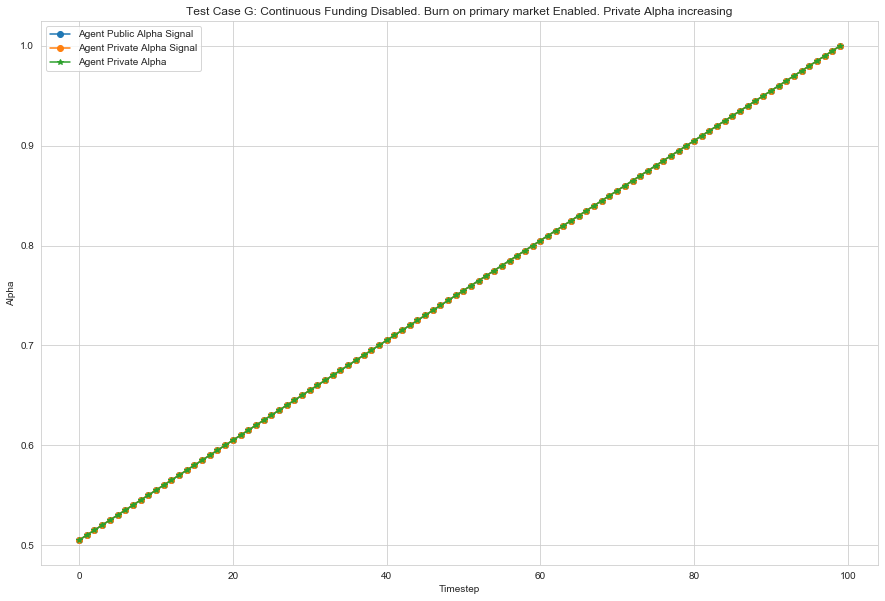

In [3]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)


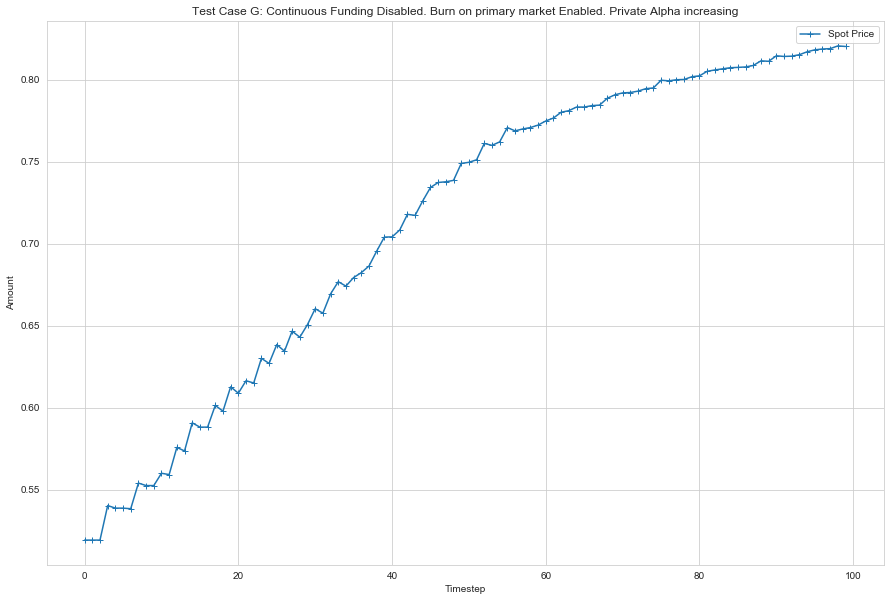

In [4]:
spot_price = price(experiments,plot_title)

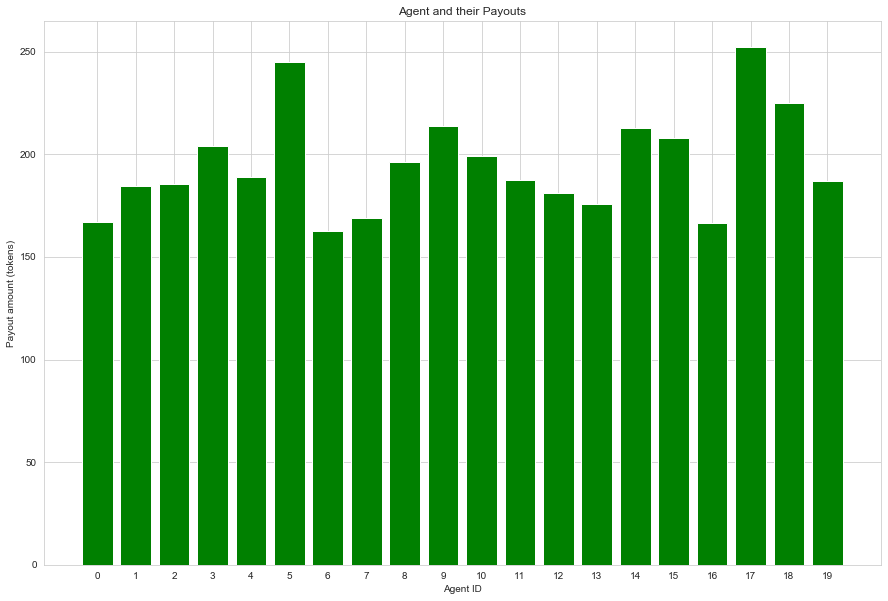

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:
## Save experiment data

import pickle 

with open('chimple_data/Test_G/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_G/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_G/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_G/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_G/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

### Test Case H: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha increasing.

Update line 27 and 28 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below:

ENABLE_CONTINUOUS = [True] <br>
ENABLE_BURN = [True] <br>
- Number of agents = 20 
- Agents' private belief of alpha is linearly increasing


Update line 44 and 45 in [sys_params.py](src/sim/model/sys_params.py) to reflect the values below: 

- alpha_bias = [1]
- price_bias = [1] 

In [1]:
import pandas as pd

import pickle

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.76s


In [2]:
experiments = run.run()
plot_title = 'Test Case H: Continuous Funding Enabled. Burn on primary market Enabled. Private Alpha increasing'


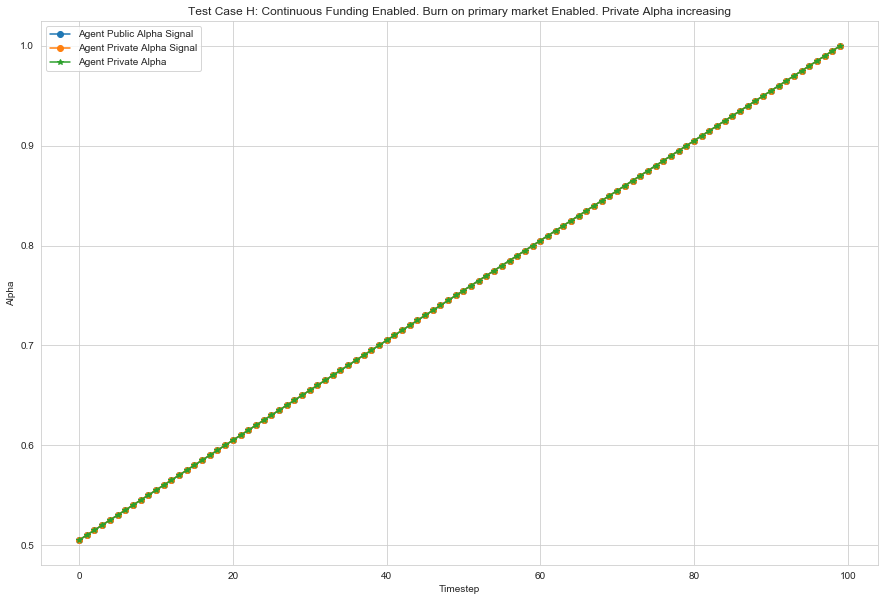

In [3]:
agent_public_alpha_signal,agent_private_alpha_signal, agent_private_alpha = alpha_plot(experiments,plot_title)

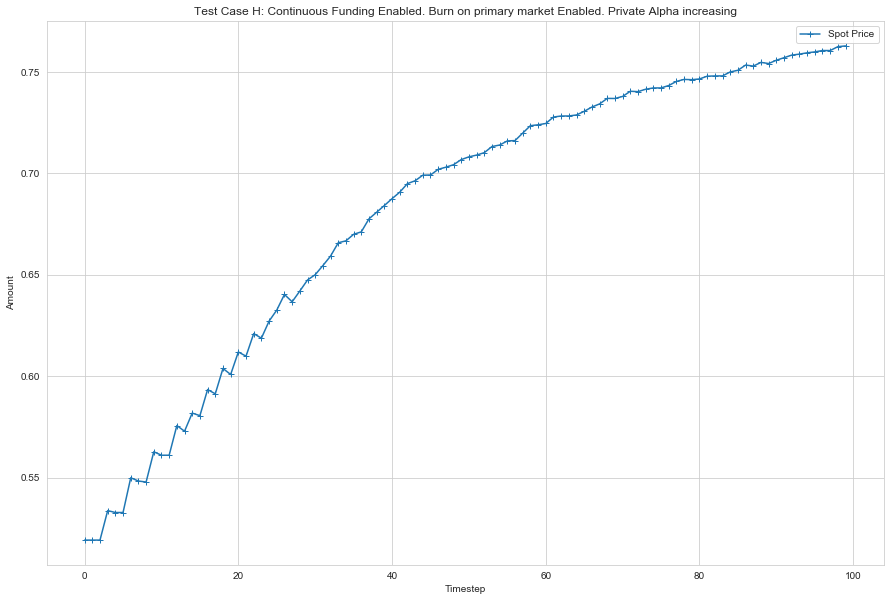

In [4]:
spot_price = price(experiments,plot_title)

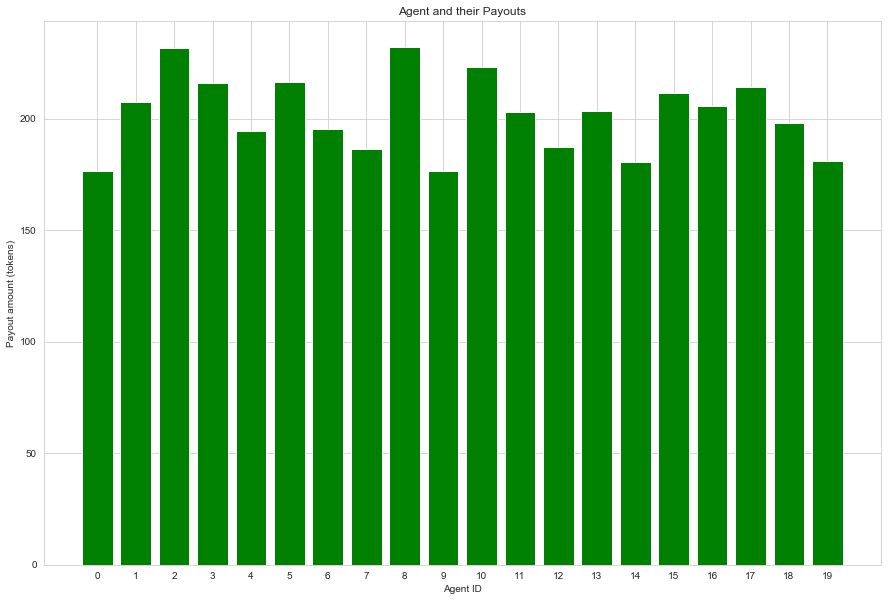

In [5]:
agent_id,payouts = agent_payout(experiments)

In [6]:
## Save experiment data

with open('chimple_data/Test_H/Alpha/agent_public_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_public_alpha_signal, filehandle)
    
with open('chimple_data/Test_H/Alpha/agent_private_alpha_signal.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_private_alpha_signal, filehandle)
    
    
with open('chimple_data/Test_H/Price/spot_price.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(spot_price, filehandle)
    
with open('chimple_data/Test_H/Payout/agent_id.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(agent_id, filehandle)
    
with open('chimple_data/Test_H/Payout/payouts.pickle', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(payouts, filehandle)

## Summary

Below we load all of the saved experiment runs and plot key variables in a grid to aid in assessing the difference between policies.

### Load data

In [1]:
import pickle
from src.sim.model.parts.utils import *


In [2]:
# Test Case A
agent_public_alpha_signal_A,agent_private_alpha_signal_A,spot_price_A,agent_id_A,payouts_A = load_experiment_data('Test_A')

In [3]:
# Test Case B
agent_public_alpha_signal_B,agent_private_alpha_signal_B,spot_price_B,agent_id_B,payouts_B = load_experiment_data('Test_B')

In [4]:
# Test Case C
agent_public_alpha_signal_C,agent_private_alpha_signal_C,spot_price_C,agent_id_C,payouts_C = load_experiment_data('Test_C')

In [5]:
# Test Case D
agent_public_alpha_signal_D,agent_private_alpha_signal_D,spot_price_D,agent_id_D,payouts_D = load_experiment_data('Test_D')

In [6]:
# Test Case E
agent_public_alpha_signal_E,agent_private_alpha_signal_E,spot_price_E,agent_id_E,payouts_E = load_experiment_data('Test_E')

In [7]:
# Test Case F
agent_public_alpha_signal_F,agent_private_alpha_signal_F,spot_price_F,agent_id_F,payouts_F = load_experiment_data('Test_F')

In [8]:
# Test Case G
agent_public_alpha_signal_G,agent_private_alpha_signal_G,spot_price_G,agent_id_G,payouts_G = load_experiment_data('Test_G')

In [9]:
# Test Case H
agent_public_alpha_signal_H,agent_private_alpha_signal_H,spot_price_H,agent_id_H,payouts_H = load_experiment_data('Test_H')

## Plots

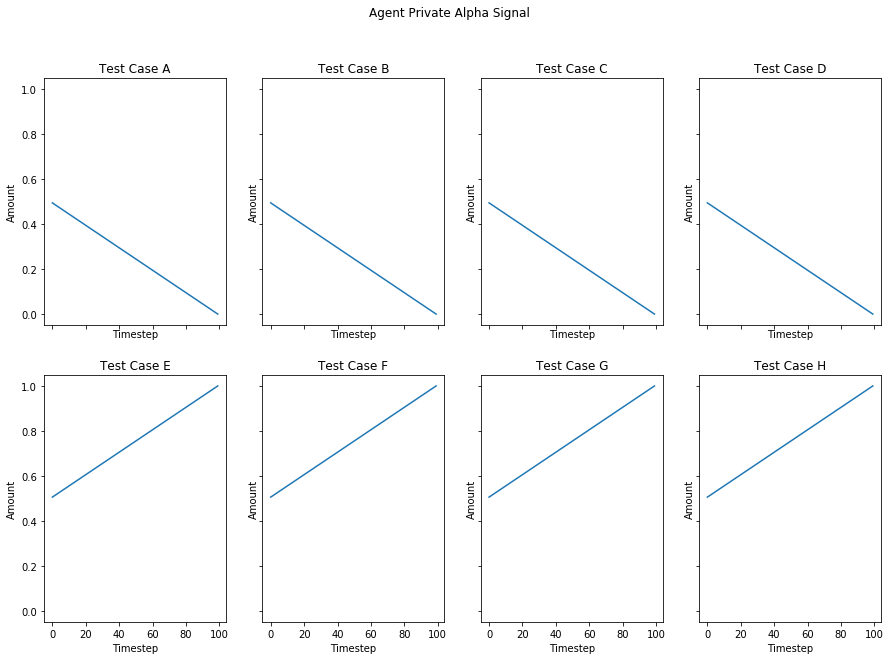

In [10]:
private_alpha_summary(agent_private_alpha_signal_A,agent_private_alpha_signal_B,agent_private_alpha_signal_C,
                          agent_private_alpha_signal_D,agent_private_alpha_signal_E,agent_private_alpha_signal_F,
                          agent_private_alpha_signal_G,agent_private_alpha_signal_H)

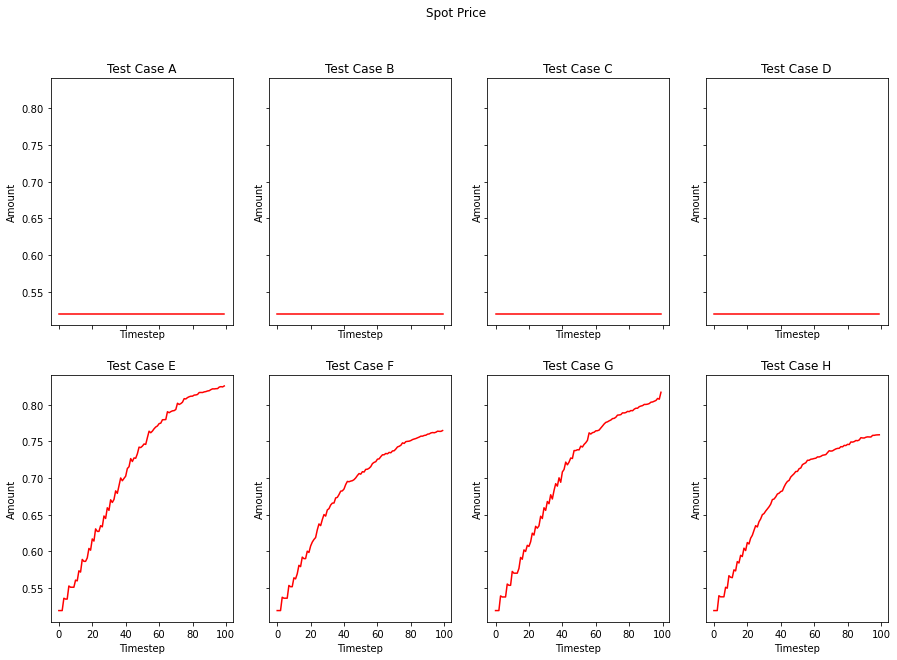

In [12]:
spot_price_summary(spot_price_A,spot_price_B,spot_price_C,spot_price_D,spot_price_E,spot_price_F,
                      spot_price_G,spot_price_H)

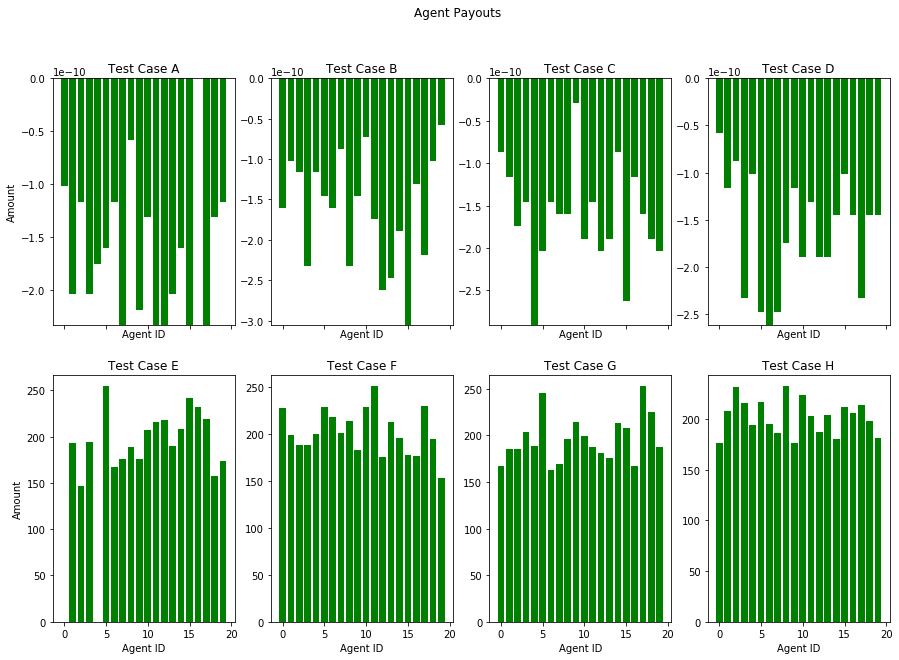

In [11]:
agent_payout_summary(agent_id_A,payouts_A,agent_id_B,payouts_B,agent_id_C,payouts_C,agent_id_D,payouts_D,
                        agent_id_E,payouts_E,agent_id_F,payouts_F,agent_id_G,payouts_G,agent_id_H,payouts_H)

## Conclusion

In this notebook, we've run a series of experiments for Chimple around continuous funding and secondary market and created summary plots to see how the relevant metrics change given the different experimental treatments.